In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
temp_df = pd.read_csv('chicago_crimes.csv', parse_dates=['Date'], dayfirst=True)

In [3]:
temp_df

Unnamed: 0        ID Case Number                Date                                Block  IUCR                Primary Type                          Description            Location Description Arrest Domestic  Beat  District  Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location
0                 3  10508693    HZ250496 2016-03-05 23:40:00                   013XX S SAWYER AVE  0486                     BATTERY              DOMESTIC BATTERY SIMPLE                       APARTMENT   True     True  1022      10.0  24.0            29.0      08B     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073 -87.706819  (41.864073157, -87.706818608)
1                89  10508695    HZ250409 2016-03-05 21:40:00                   061XX S DREXEL AVE  0486                     BATTERY              DOMESTIC BATTERY SIMPLE                       RESIDENCE  False     True   313       3.0  20.0            42.0      08B     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922 -87.604363   (41.782921527, -87.60436317)
2               197  10508697    HZ250503 2016-03-05 23:31:00                  053XX W CHICAGO AVE  0470      PUBLIC PEACE VIOLATION                     RECKLESS CONDUCT                          STREET  False    False  1524      15.0  37.0            25.0       24     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908 -87.758372  (41.894908283, -87.758371958)
3               673  10508698    HZ250424 2016-03-05 22:10:00                    049XX W FULTON ST  0460                     BATTERY                               SIMPLE                        SIDEWALK  False    False  1532      15.0  28.0            25.0      08B     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687 -87.749516  (41.885686845, -87.749515983)
4               911  10508699    HZ250455 2016-03-05 22:00:00                    003XX N LOTUS AVE  0820                       THEFT                       $500 AND UNDER                       RESIDENCE  False     True  1523      15.0  28.0            25.0       06     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297 -87.761751  (41.886297242, -87.761750709)
5              1108  10508702    HZ250447 2016-03-05 22:35:00                 082XX S MARYLAND AVE  041A                     BATTERY                  AGGRAVATED: HANDGUN                          STREET  False    False   631       6.0   8.0            44.0      04B     1183336.0     1850642.0  2016  05/10/2016 03:56:50 PM  41.745354 -87.603799  (41.745354023, -87.603798903)
6              1130  10508703    HZ250489 2016-03-05 22:30:00                     027XX S STATE ST  0460                     BATTERY                               SIMPLE  CHA HALLWAY/STAIRWELL/ELEVATOR  False    False   133       1.0   3.0            35.0      08B     1176730.0     1886544.0  2016  05/10/2016 03:56:50 PM  41.844024 -87.626923  (41.844023772, -87.626923253)
7              1801  10508704    HZ250514 2016-03-05 21:30:00                      002XX E 46TH ST  0460                     BATTERY                               SIMPLE         RESIDENCE PORCH/HALLWAY  False    False   215       2.0   3.0            38.0      08B     1178514.0     1874573.0  2016  05/10/2016 03:56:50 PM  41.811134 -87.620741   (41.811133958, -87.62074077)
8              1868  10508709    HZ250523 2016-03-05 16:00:00                    014XX W DEVON AVE  0460                     BATTERY                               SIMPLE                        SIDEWALK  False    False  2432      24.0  40.0             1.0      08B     1165696.0     1942616.0  2016  05/10/2016 03:56:50 PM  41.998131 -87.665814   (41.99813061, -87.665814038)
9              1891  10508982    HZ250667 2016-03-05 22:30:00                  069XX S ASHLAND AVE  0486                     BATTERY              DOMESTIC BATTERY SIMPLE                          STREET  False     True   735       7.0  17.0          

In [4]:
temp_df['Latitude'].unique()

array([ 41.86407316,  41.78292153,  41.89490828, ...,  41.76679686,
        41.72016406,  41.75830866])

In [5]:
temp_df['Longitude'].unique()

array([-87.70681861, -87.60436317, -87.75837196, ..., -87.62333202,
       -87.65766943, -87.62065842])

In [6]:
not_empty_row = pd.notnull(temp_df['Latitude'])
not_empty_row

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
           ... 
1456684    True
1456685    True
1456686    True
1456687    True
1456688    True
1456689    True
1456690    True
1456691    True
1456692    True
1456693    True
1456694    True
1456695    True
1456696    True
1456697    True
1456698    True
1456699    True
1456700    True
1456701    True
1456702    True
1456703    True
1456704    True
1456705    True
1456706    True
1456707    True
1456708    True
1456709    True
1456710    True
1456711    True
1456712    True
1456713    True
Name: Latitude, dtype: b

In [7]:
temp_df = temp_df[not_empty_row]
temp_df['Latitude'].unique()

array([ 41.86407316,  41.78292153,  41.89490828, ...,  41.76679686,
        41.72016406,  41.75830866])

In [8]:
# Cek for longitude
temp_df['Longitude'].unique()

array([-87.70681861, -87.60436317, -87.75837196, ..., -87.62333202,
       -87.65766943, -87.62065842])

In [9]:
unique_primary_type = temp_df['Primary Type'].unique()
unique_primary_type

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [10]:
temp_df['Primary Type'].value_counts()

THEFT                                322433
BATTERY                              258945
CRIMINAL DAMAGE                      152817
NARCOTICS                            131184
ASSAULT                               89512
OTHER OFFENSE                         85362
BURGLARY                              81673
DECEPTIVE PRACTICE                    68356
MOTOR VEHICLE THEFT                   59858
ROBBERY                               56096
CRIMINAL TRESPASS                     36432
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10591
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [11]:
def getLevel(x, cls):
    cat = {}
    for i in range(len(x)):
        val = x.iloc[i]
        arrest = cls.iloc[i]
        if arrest:
            if val in cat:
                cat[val] -= 1
            else:
                cat[val] = 1
        else:
            if val in cat:
                cat[val] += 1
            else:
                cat[val] = 1
    level = 0
    final = {}
    len_of_cat = len(cat)
    for i in range(len_of_cat):
        minimum = min(cat, key=cat.get)
        final[minimum] = level
        cat.pop(minimum)
        level +=1
    return final

def getLevelDomestic(x, cls):
    cat = {}
    for i in range(len(x)):
        val = x.iloc[i]
        arrest = cls.iloc[i]
        if arrest:
            if val in cat:
                cat[val] += 1
            else:
                cat[val] = 1
        else:
            if val in cat:
                cat[val] -= 1
            else:
                cat[val] = 1
    level = 0
    final = {}
    len_of_cat = len(cat)
    for i in range(len_of_cat):
        minimum = min(cat, key=cat.get)
        final[minimum] = level
        cat.pop(minimum)
        level +=1
    return final
    
get_level_primetype = getLevel(temp_df['Primary Type'], temp_df['Arrest'])
get_level_locdesc = getLevel(temp_df['Location Description'], temp_df['Arrest'])
get_level_domestic = getLevelDomestic(temp_df['Domestic'], temp_df['Arrest'])

In [12]:
#Prediksi dalam melakukan kejahatan
def predictArrest(x, cls):
    arrested = {}
    not_arrested = {}
    for i in range(len(x)):
        val = x.iloc[i]
        arrest = cls.iloc[i]
        if arrest:
            if val in arrested:
                arrested[val] += 1
            else:
                arrested[val] = 1
        else:
            if val in not_arrested:
                not_arrested[val] += 1
            else:
                not_arrested[val] = 1
    return arrested, not_arrested

prime_arrest, prime_not_arrest = predictArrest(temp_df['Primary Type'], temp_df['Arrest'])
locdesc_arrest, locdesc_not_arrest = predictArrest(temp_df['Location Description'], temp_df['Arrest'])
dom_arrest, dom_not_arrest = predictArrest(temp_df['Domestic'], temp_df['Arrest'])

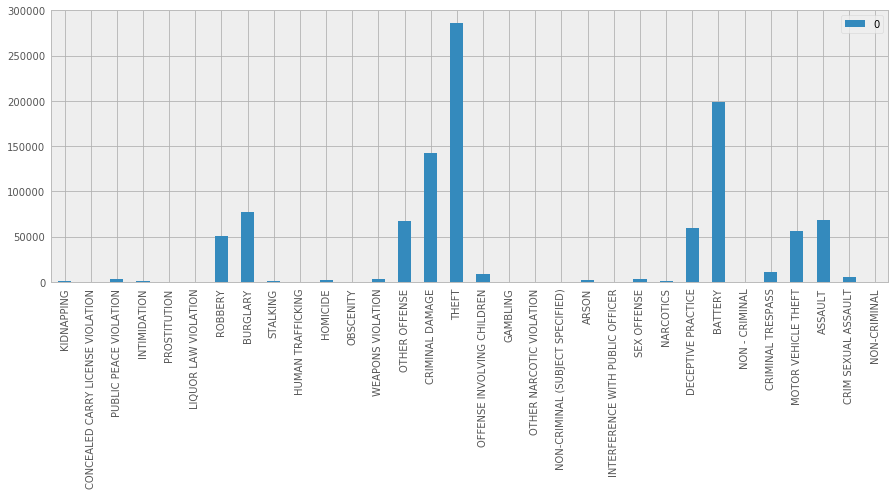

In [13]:
prime_df = pd.DataFrame(prime_not_arrest.values(), index=prime_not_arrest.keys())
prime_df.plot(kind='bar')

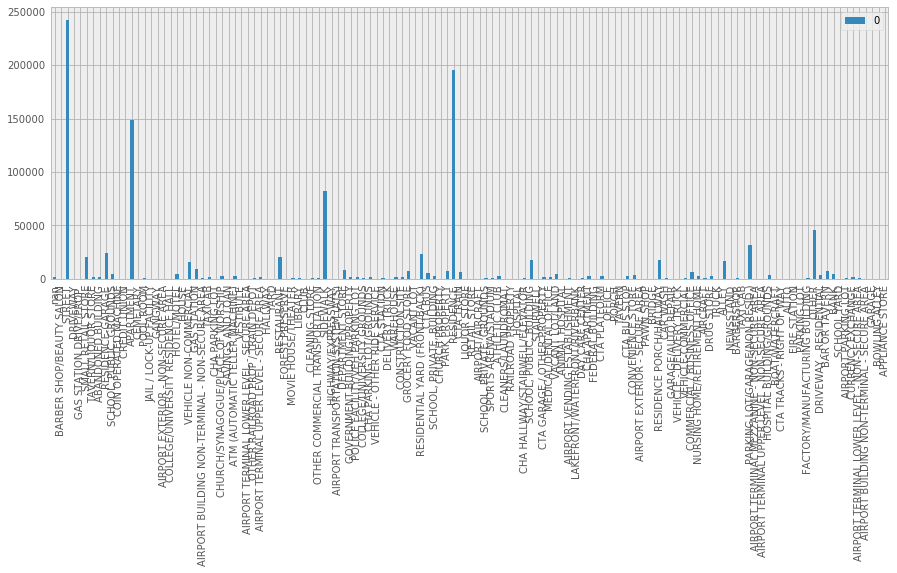

In [14]:
locdesc_df = pd.DataFrame(locdesc_not_arrest.values(), index=locdesc_not_arrest.keys())
locdesc_df.plot(kind='bar')

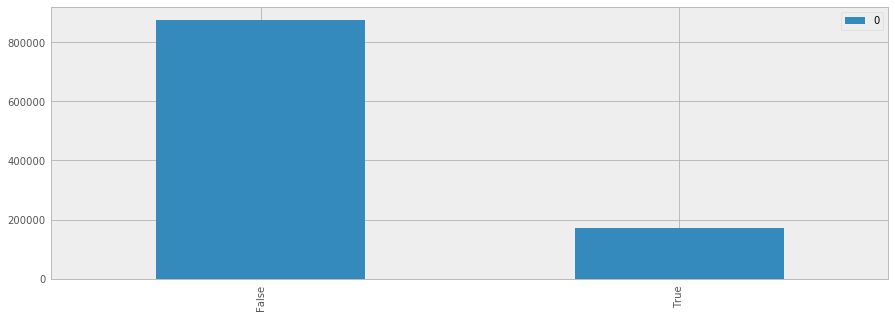

In [15]:
dom_df = pd.DataFrame(dom_not_arrest.values(), index=dom_not_arrest.keys())
dom_df.plot(kind='bar')

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode

In [19]:
init_notebook_mode()

data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = temp_df['Longitude'][:10000],
        lat = temp_df['Latitude'][:10000],
        mode = 'markers',
        marker = dict(
            size = 5.5,
            opacity = 0.75,
            color = 'rgb(0, 163, 81)',
            line = dict(color = 'rgb(255, 255, 255)', width = 1))
        )]

layout = dict(
         title = 'Location Crimes in Chicago',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             showland = True,
             landcolor = 'rgb(250, 250, 250)',
             subunitwidth = 1,
             subunitcolor = 'rgb(217, 217, 217)',
             countrywidth = 1,
             countrycolor = 'rgb(217, 217, 217)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
        )

figure = dict(data = data, layout = layout)
iplot(figure)

In [20]:
def normalizeCategorical(level, x):
    new = []
    for i in range(len(x)):
        val = x.iloc[i]
        new.append(level[val])
    return new

temp_df['Primary Type'] = normalizeCategorical(get_level_primetype, temp_df['Primary Type'])
temp_df['Location Description'] = normalizeCategorical(get_level_locdesc, temp_df['Location Description'])
temp_df['Domestic'] = normalizeCategorical(get_level_domestic, temp_df['Domestic'])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [21]:
temp_df

Unnamed: 0        ID Case Number                Date                                Block  IUCR  Primary Type                          Description  Location Description Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location
0                 3  10508693    HZ250496 2016-03-05 23:40:00                   013XX S SAWYER AVE  0486            31              DOMESTIC BATTERY SIMPLE                   138   True         1  1022      10.0  24.0            29.0      08B     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073 -87.706819  (41.864073157, -87.706818608)
1                89  10508695    HZ250409 2016-03-05 21:40:00                   061XX S DREXEL AVE  0486            31              DOMESTIC BATTERY SIMPLE                   140  False         1   313       3.0  20.0            42.0      08B     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922 -87.604363   (41.782921527, -87.60436317)
2               197  10508697    HZ250503 2016-03-05 23:31:00                  053XX W CHICAGO AVE  0470             4                     RECKLESS CONDUCT                   139  False         0  1524      15.0  37.0            25.0       24     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908 -87.758372  (41.894908283, -87.758371958)
3               673  10508698    HZ250424 2016-03-05 22:10:00                    049XX W FULTON ST  0460            31                               SIMPLE                   127  False         0  1532      15.0  28.0            25.0      08B     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687 -87.749516  (41.885686845, -87.749515983)
4               911  10508699    HZ250455 2016-03-05 22:00:00                    003XX N LOTUS AVE  0820            32                       $500 AND UNDER                   140  False         1  1523      15.0  28.0            25.0       06     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297 -87.761751  (41.886297242, -87.761750709)
5              1108  10508702    HZ250447 2016-03-05 22:35:00                 082XX S MARYLAND AVE  041A            31                  AGGRAVATED: HANDGUN                   139  False         0   631       6.0   8.0            44.0      04B     1183336.0     1850642.0  2016  05/10/2016 03:56:50 PM  41.745354 -87.603799  (41.745354023, -87.603798903)
6              1130  10508703    HZ250489 2016-03-05 22:30:00                     027XX S STATE ST  0460            31                               SIMPLE                    55  False         0   133       1.0   3.0            35.0      08B     1176730.0     1886544.0  2016  05/10/2016 03:56:50 PM  41.844024 -87.626923  (41.844023772, -87.626923253)
7              1801  10508704    HZ250514 2016-03-05 21:30:00                      002XX E 46TH ST  0460            31                               SIMPLE                   131  False         0   215       2.0   3.0            38.0      08B     1178514.0     1874573.0  2016  05/10/2016 03:56:50 PM  41.811134 -87.620741   (41.811133958, -87.62074077)
8              1868  10508709    HZ250523 2016-03-05 16:00:00                    014XX W DEVON AVE  0460            31                               SIMPLE                   127  False         0  2432      24.0  40.0             1.0      08B     1165696.0     1942616.0  2016  05/10/2016 03:56:50 PM  41.998131 -87.665814   (41.99813061, -87.665814038)
9              1891  10508982    HZ250667 2016-03-05 22:30:00                  069XX S ASHLAND AVE  0486            31              DOMESTIC BATTERY SIMPLE                   139  False         1   735       7.0  17.0            67.0      08B     1166876.0     1858796.0  2016  05/10/2016 03:56:50 PM  41.768097 -87.663879  (41.768096835, -87.663878589)
10             1935  10508710    HZ250469 2016-03-05 21:44:00               074XX S SOUTH SHORE DR  143A             2        

In [22]:
def normalization(x):
    mean = x.mean()
    std = x.std()
    temp = []
    for i in range(len(x)):
        val = x.iloc[i]
        temp.append((val-mean)/std)
    array = np.array(temp)
    return array
temp_df['Primary Type'] = normalization(temp_df['Primary Type'])
temp_df['Location Description'] = normalization(temp_df['Location Description'])
temp_df['Beat'] = normalization(temp_df['Beat'])
temp_df['District'] = normalization(temp_df['District'])
temp_df['Ward'] = normalization(temp_df['Ward'])
temp_df['Community Area'] = normalization(temp_df['Community Area'])
temp_df['Latitude'] = normalization(temp_df['Latitude'])
temp_df['Longitude'] = normalization(temp_df['Longitude'])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

In [23]:
temp_df

Unnamed: 0        ID Case Number                Date                                Block  IUCR  Primary Type                          Description  Location Description Arrest  Domestic      Beat  District      Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year              Updated On  Latitude  Longitude                       Location
0                 3  10508693    HZ250496 2016-03-05 23:40:00                   013XX S SAWYER AVE  0486      0.573778              DOMESTIC BATTERY SIMPLE              0.389985   True         1 -0.185783 -0.182099  0.082572       -0.394873      08B     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  0.239667  -0.519134  (41.864073157, -87.706818608)
1                89  10508695    HZ250409 2016-03-05 21:40:00                   061XX S DREXEL AVE  0486      0.573778              DOMESTIC BATTERY SIMPLE              0.460689  False         1 -1.210828 -1.195874 -0.207340        0.211680      08B     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM -0.620890   1.018838   (41.782921527, -87.60436317)
2               197  10508697    HZ250503 2016-03-05 23:31:00                  053XX W CHICAGO AVE  0470     -1.993372                     RECKLESS CONDUCT              0.425337  False         0  0.539990  0.542026  1.024786       -0.581505       24     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  0.566653  -1.293007  (41.894908283, -87.758371958)
3               673  10508698    HZ250424 2016-03-05 22:10:00                    049XX W FULTON ST  0460      0.573778                               SIMPLE              0.001111  False         0  0.551556  0.542026  0.372484       -0.581505      08B     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  0.468866  -1.160069  (41.885686845, -87.749515983)
4               911  10508699    HZ250455 2016-03-05 22:00:00                    003XX N LOTUS AVE  0820      0.668858                       $500 AND UNDER              0.460689  False         1  0.538544  0.542026  0.372484       -0.581505       06     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  0.475339  -1.343726  (41.886297242, -87.761750709)
5              1108  10508702    HZ250447 2016-03-05 22:35:00                 082XX S MARYLAND AVE  041A      0.573778                  AGGRAVATED: HANDGUN              0.425337  False         0 -0.751076 -0.761399 -1.077077        0.304996      04B     1183336.0     1850642.0  2016  05/10/2016 03:56:50 PM -1.019267   1.027308  (41.745354023, -87.603798903)
6              1130  10508703    HZ250489 2016-03-05 22:30:00                     027XX S STATE ST  0460      0.573778                               SIMPLE             -2.544245  False         0 -1.471066 -1.485524 -1.439467       -0.114925      08B     1176730.0     1886544.0  2016  05/10/2016 03:56:50 PM  0.027057   0.680185  (41.844023772, -87.626923253)
7              1801  10508704    HZ250514 2016-03-05 21:30:00                      002XX E 46TH ST  0460      0.573778                               SIMPLE              0.142520  False         0 -1.352513 -1.340699 -1.439467        0.025048      08B     1178514.0     1874573.0  2016  05/10/2016 03:56:50 PM -0.321716   0.772991   (41.811133958, -87.62074077)
8              1868  10508709    HZ250523 2016-03-05 16:00:00                    014XX W DEVON AVE  0460      0.573778                               SIMPLE              0.001111  False         0  1.852742  1.845451  1.242221       -1.701295      08B     1165696.0     1942616.0  2016  05/10/2016 03:56:50 PM  1.661255   0.096391   (41.99813061, -87.665814038)
9              1891  10508982    HZ250667 2016-03-05 22:30:00                  069XX S ASHLAND AVE  0486      0.573778              DOMESTIC BATTERY SIMPLE              0.425337  False         1 -0.600717 -0.616574 -0.424774        1.378129      08B     1166876.0     1858796.0  2016  05/10/2016 03:56:50 PM -0.778096   0.125444  (41.768096835, -87.663878589)
10             1935  10508710    HZ250469 2016-03

In [24]:
outliers = (temp_df['Primary Type'] >= -2) & (temp_df['Primary Type'] <= 2) & \
            (temp_df['Location Description'] >= -2) & (temp_df['Location Description'] <= 2) & \
            (temp_df['Beat'] >= -2) & (temp_df['Beat'] <= 2) & \
            (temp_df['District'] >= -2) & (temp_df['District'] <= 2) & \
            (temp_df['Ward'] >= -2) & (temp_df['Ward'] <= 2) & \
            (temp_df['Community Area'] >= -2) & (temp_df['Community Area'] <= 2) & \
            (temp_df['Latitude'] >= -2) & (temp_df['Latitude'] <= 2) & \
            (temp_df['Longitude'] >= -2) & (temp_df['Longitude'] <= 2)
outliers.value_counts()

True     1140605
False     279026
dtype: int64

In [25]:
temp_df = temp_df[outliers]

In [26]:
outliers_check = (temp_df['Primary Type'] >= -2) | (temp_df['Primary Type'] <= 2) | \
            (temp_df['Location Description'] >= -2) | (temp_df['Location Description'] <= 2) | \
            (temp_df['Beat'] >= -2) | (temp_df['Beat'] <= 2) | \
            (temp_df['District'] >= -2) | (temp_df['District'] <= 2) | \
            (temp_df['Ward'] >= -2) | (temp_df['Ward'] <= 2) | \
            (temp_df['Community Area'] >= -2) | (temp_df['Community Area'] <= 2) | \
            (temp_df['Latitude'] >= -2) | (temp_df['Latitude'] <= 2) | \
            (temp_df['Longitude'] >= -2) | (temp_df['Longitude'] <= 2)
outliers_check.value_counts()

True    1140605
dtype: int64

In [27]:
temp_df

Unnamed: 0        ID Case Number                Date                                Block  IUCR  Primary Type                          Description  Location Description Arrest  Domestic      Beat  District      Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year              Updated On  Latitude  Longitude                       Location
0                 3  10508693    HZ250496 2016-03-05 23:40:00                   013XX S SAWYER AVE  0486      0.573778              DOMESTIC BATTERY SIMPLE              0.389985   True         1 -0.185783 -0.182099  0.082572       -0.394873      08B     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  0.239667  -0.519134  (41.864073157, -87.706818608)
1                89  10508695    HZ250409 2016-03-05 21:40:00                   061XX S DREXEL AVE  0486      0.573778              DOMESTIC BATTERY SIMPLE              0.460689  False         1 -1.210828 -1.195874 -0.207340        0.211680      08B     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM -0.620890   1.018838   (41.782921527, -87.60436317)
2               197  10508697    HZ250503 2016-03-05 23:31:00                  053XX W CHICAGO AVE  0470     -1.993372                     RECKLESS CONDUCT              0.425337  False         0  0.539990  0.542026  1.024786       -0.581505       24     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  0.566653  -1.293007  (41.894908283, -87.758371958)
3               673  10508698    HZ250424 2016-03-05 22:10:00                    049XX W FULTON ST  0460      0.573778                               SIMPLE              0.001111  False         0  0.551556  0.542026  0.372484       -0.581505      08B     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  0.468866  -1.160069  (41.885686845, -87.749515983)
4               911  10508699    HZ250455 2016-03-05 22:00:00                    003XX N LOTUS AVE  0820      0.668858                       $500 AND UNDER              0.460689  False         1  0.538544  0.542026  0.372484       -0.581505       06     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  0.475339  -1.343726  (41.886297242, -87.761750709)
5              1108  10508702    HZ250447 2016-03-05 22:35:00                 082XX S MARYLAND AVE  041A      0.573778                  AGGRAVATED: HANDGUN              0.425337  False         0 -0.751076 -0.761399 -1.077077        0.304996      04B     1183336.0     1850642.0  2016  05/10/2016 03:56:50 PM -1.019267   1.027308  (41.745354023, -87.603798903)
7              1801  10508704    HZ250514 2016-03-05 21:30:00                      002XX E 46TH ST  0460      0.573778                               SIMPLE              0.142520  False         0 -1.352513 -1.340699 -1.439467        0.025048      08B     1178514.0     1874573.0  2016  05/10/2016 03:56:50 PM -0.321716   0.772991   (41.811133958, -87.62074077)
8              1868  10508709    HZ250523 2016-03-05 16:00:00                    014XX W DEVON AVE  0460      0.573778                               SIMPLE              0.001111  False         0  1.852742  1.845451  1.242221       -1.701295      08B     1165696.0     1942616.0  2016  05/10/2016 03:56:50 PM  1.661255   0.096391   (41.99813061, -87.665814038)
9              1891  10508982    HZ250667 2016-03-05 22:30:00                  069XX S ASHLAND AVE  0486      0.573778              DOMESTIC BATTERY SIMPLE              0.425337  False         1 -0.600717 -0.616574 -0.424774        1.378129      08B     1166876.0     1858796.0  2016  05/10/2016 03:56:50 PM -0.778096   0.125444  (41.768096835, -87.663878589)
11             2150  10508715    HZ250541 2016-03-05 23:11:00                   006XX N WABASH AVE  0486      0.573778              DOMESTIC BATTERY SIMPLE              0.001111   True         1  0.988176  0.976501  1.387177       -1.374690      08B     1176630.0     1904401.0  2016  05/10/2016 03:56:50 PM  0.546700   0.682774  (41.893026751, -87.626750829)
12             2193  10508717    HZ250415 2016-03

In [28]:
prime_arr = temp_df['Primary Type'].values.tolist()
locdesc_arr = temp_df['Location Description'].values.tolist()
dom_arr = temp_df['Domestic'].values.tolist()
beat_arr = temp_df['Beat'].values.tolist()
dist_arr = temp_df['District'].values.tolist()
ward_arr = temp_df['Ward'].values.tolist()
com_arr = temp_df['Community Area'].values.tolist()
lat_arr = temp_df['Latitude'].values.tolist()
lng_arr = temp_df['Longitude'].values.tolist()

datas = []
for i in range(len(prime_arr)):
    datas.append([prime_arr[i], \
                  locdesc_arr[i], \
                  dom_arr[i], \
                  beat_arr[i], \
                  dist_arr[i], \
                  ward_arr[i], \
                  com_arr[i], \
                  lat_arr[i], \
                  lng_arr[i]])
datas

[[0.5737784519008957,
  0.38998485594222,
  1L,
  -0.1857829577894533,
  -0.18209885268346046,
  0.08257199606750969,
  -0.3948730017277414,
  0.23966737232220858,
  -0.5191336752599766],
 [0.5737784519008957,
  0.4606891854275774,
  1L,
  -1.210828369562784,
  -1.1958735968408347,
  -0.20734014122916397,
  0.21168017598698477,
  -0.6208898830479083,
  1.018837615829517],
 [-1.9933716268849913,
  0.4253370206848987,
  0L,
  0.5399896750881377,
  0.5420259645718069,
  1.024786442281699,
  -0.581504748716888,
  0.56665268856972,
  -1.2930074081457166],
 [0.5737784519008957,
  0.0011110437727543433,
  0L,
  0.5515557728232388,
  0.5420259645718069,
  0.37248413336418335,
  -0.581504748716888,
  0.46886567707231314,
  -1.1600692686922316],
 [0.6688580844485211,
  0.4606891854275774,
  1L,
  0.53854391287125,
  0.5420259645718069,
  0.37248413336418335,
  -0.581504748716888,
  0.4753385176918092,
  -1.3437262585959944],
 [0.5737784519008957,
  0.4253370206848987,
  0L,
  -0.7510759845925172

In [29]:
import os
import sys

spark_path = "D:/spark"

os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path
os.environ['PYSPARK_PYTHON'] = sys.executable

sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

from pyspark import SparkContext
from pyspark import SparkConf

conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")


sc = SparkContext("local", conf=conf)
print sc

In [30]:
from pyspark.mllib.clustering import KMeans, KMeansModel

In [31]:
data_rdd = sc.parallelize(datas)

In [32]:
# Build the model (cluster the data)
clusters = KMeans.train(data_rdd, 2, maxIterations=10, initializationMode="random")

In [33]:
print clusters.clusterCenters

[array([ 0.36976828,  0.21229129,  0.16040115,  0.82032855,  0.8225818 ,
        0.71940082, -0.68806148,  0.65424133, -0.43238394]), array([ 0.35254824,  0.22670899,  0.20169356, -0.81392582, -0.8156979 ,
       -0.72849332,  0.66465553, -0.65357829,  0.51487344])]


In [34]:
cluster_1 = []
cluster_2 = []
r_cluster = []
for i in range(len(datas)):
    cls = clusters.predict(datas[i])
    if cls == 0:
        cluster_1.append(datas[i])
    elif cls == 1:
        cluster_2.append(datas[i])
    r_cluster.append(cls)

In [35]:
test = temp_df['Arrest'].values.tolist()
hit = 0
for i in range(len(test)):
    if r_cluster[i] == 1 and test[i] == True:
        hit += 1
    elif r_cluster[i] == 0 and test[i] == False:
        hit += 1
print hit
print len(test)

568692
1140605


In [36]:
#Planning evil plan
evil_primary_type = (16-temp_df['Primary Type'].mean())/temp_df['Primary Type'].std()
evil_location_description = (29-temp_df['Location Description'].mean())/temp_df['Location Description'].std()
evil_domestic = 0
evil_beat = temp_df['Beat'].mean()
evil_district = temp_df['District'].mean()
evil_ward = temp_df['Ward'].mean()
evil_comm = temp_df['Community Area'].mean()
evil_lat = temp_df['Latitude'].mean()
evil_lng = temp_df['Longitude'].mean()

evil_plan = []
evil_plan.append(evil_primary_type)
evil_plan.append(evil_location_description)
evil_plan.append(evil_domestic)
evil_plan.append(evil_beat)
evil_plan.append(evil_district)
evil_plan.append(evil_ward)
evil_plan.append(evil_comm)
evil_plan.append(evil_lat)
evil_plan.append(evil_lng)

evil_plan = np.array(evil_plan)
evil_res = clusters.predict(evil_plan)

if evil_res:
    print "Anda kemungkinan tertangkap"
else:
    print "Anda kemungkinan tidak tertangkap"

Anda kemungkinan tertangkap
